In [30]:
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


inputs = np.array([[1,1,1,1,0,1,1,0,1,1,0,1,1,1,1],
                   [0,0,1,0,0,1,0,0,1,0,0,1,0,0,1],
                   [1,1,1,0,0,1,1,1,1,1,0,0,1,1,1],
                   [1,1,1,0,0,1,1,1,1,0,0,1,1,1,1],
                   [1,0,1,1,0,1,1,1,1,0,0,1,0,0,1],
                   [1,1,1,1,0,0,1,1,1,0,0,1,1,1,1],
                   [1,1,1,1,0,0,1,1,1,1,0,1,1,1,1],
                   [1,1,1,0,0,1,0,0,1,0,0,1,0,0,1],
                   [1,1,1,1,0,1,1,1,1,1,0,1,1,1,1],
                   [1,1,1,1,0,1,1,1,1,0,0,1,0,0,1]])

expected_output = np.eye(10)

epochs = 100000
lr = 0.15
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 15,20,10


hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))



for i in range(epochs):
    
    hidden_layer_activation = np.dot(inputs,hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    



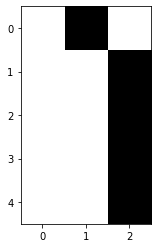

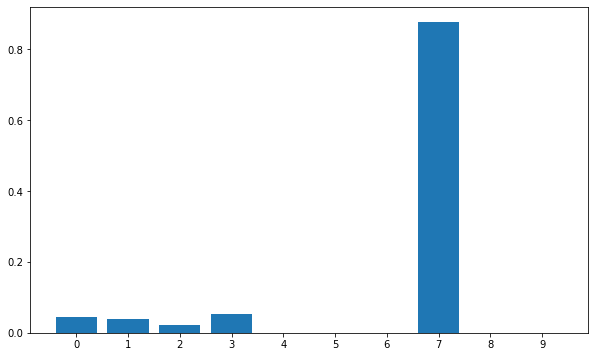

In [32]:
inputs = np.array([[0,1,0,0,0,1,0,0,1,0,0,1,0,0,1]])
plt.imshow(np.resize(inputs, (5, 3)), cmap='Greys')
plt.show()

hidden_layer_activation = np.dot(inputs,hidden_weights)
hidden_layer_activation += hidden_bias
hidden_layer_output = sigmoid(hidden_layer_activation)

output_layer_activation = np.dot(hidden_layer_output,output_weights)
output_layer_activation += output_bias
predicted_output = sigmoid(output_layer_activation)

fig = plt.figure(figsize=(10, 6))
plt.bar(range(10), predicted_output[0])
plt.xticks(range(10))
plt.show()